In [0]:
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

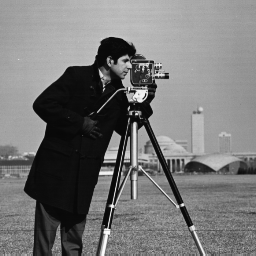

In [2]:
path = r'cameraman.tif'

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 

cv2_imshow(img)

**ROTATING_IMAGE**

In [0]:
def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

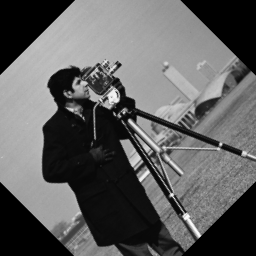

In [10]:
r_img = rotateImage(img, angle = 45)
cv2_imshow(r_img)

**HARRIS**

In [0]:
def HARRIS(image):
  im = np.float32(image)
  corners_img = cv2.cornerHarris(im,3,3,0.04)
  im[corners_img>0.001*corners_img.max()] = 255
  return im 

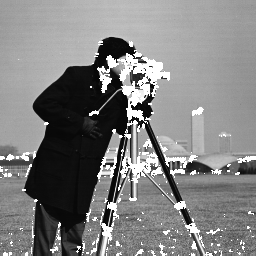

In [6]:
cv2_imshow(HARRIS(img))

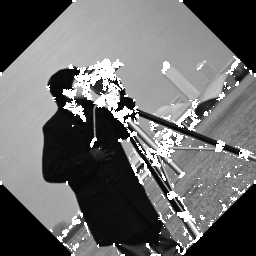

In [7]:
cv2_imshow(HARRIS(r_img))

**FAST_FEATURE_DETECTOR**

In [0]:
def FastFeatureDetector(img , threshold = 50):

  # Initiate FAST object with default values
  fast = cv2.FastFeatureDetector_create(50)
  # find and draw the keypoints
  kp = fast.detect(img,None)
  return cv2.drawKeypoints(img, kp, img,color=(255,0,0))

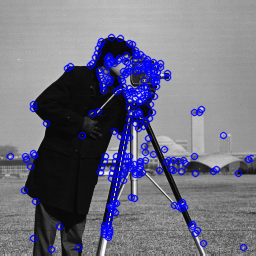

In [9]:
cv2_imshow(FastFeatureDetector(img))

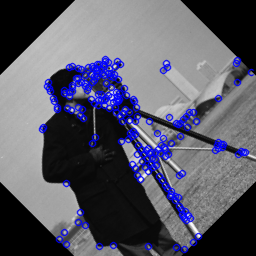

In [10]:
cv2_imshow(FastFeatureDetector(r_img))

**ORB**

In [0]:
def ORB(img):
  
  # Initiate STAR detector
  orb = cv2.ORB_create()

  # find the keypoints with ORB
  kp = orb.detect(img,None)

  # compute the descriptors with ORB
  kp, des = orb.compute(img, kp)

  # draw only keypoints location,not size and orientation
  img2 = cv2.drawKeypoints(img,kp,img,color=(0,255,0), flags=0)

  return img2

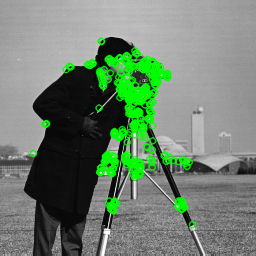

In [11]:
cv2_imshow(ORB(img))

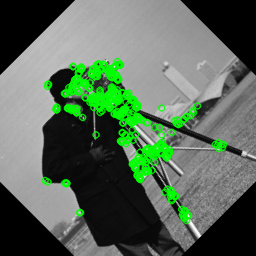

In [12]:
cv2_imshow(ORB(r_img))